In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Importing Training Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data = train_data.drop(columns='id',axis=1)

Checking Data

In [4]:
train_data.shape

(219129, 31)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219129 non-null  float64
 1   V1      219129 non-null  float64
 2   V2      219129 non-null  float64
 3   V3      219129 non-null  float64
 4   V4      219129 non-null  float64
 5   V5      219129 non-null  float64
 6   V6      219129 non-null  float64
 7   V7      219129 non-null  float64
 8   V8      219129 non-null  float64
 9   V9      219129 non-null  float64
 10  V10     219129 non-null  float64
 11  V11     219129 non-null  float64
 12  V12     219129 non-null  float64
 13  V13     219129 non-null  float64
 14  V14     219129 non-null  float64
 15  V15     219129 non-null  float64
 16  V16     219129 non-null  float64
 17  V17     219129 non-null  float64
 18  V18     219129 non-null  float64
 19  V19     219129 non-null  float64
 20  V20     219129 non-null  float64
 21  V21     21

In [6]:
train_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [7]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


Our Target Variable is Class

In [8]:
train_data['Class'].value_counts(
    
)

Class
0    218660
1       469
Name: count, dtype: int64

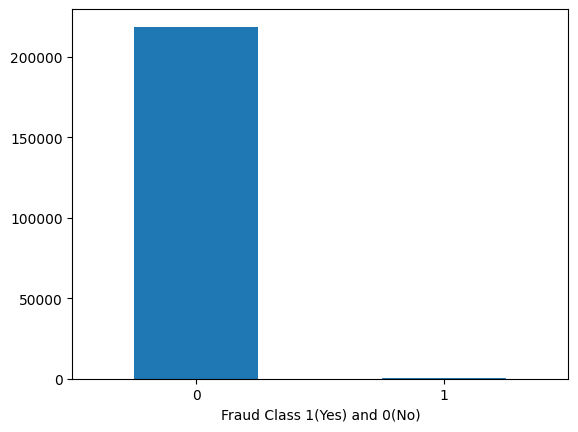

In [9]:
train_data.Class.value_counts().sort_index().plot.bar()
plt.xlabel("Fraud Class 1(Yes) and 0(No)")
plt.xticks(rotation=0)
plt.show()

Dividing Features and labels for sampling

In [10]:
y_train = train_data['Class']
train_data = train_data.drop(columns='Class',axis=1)

The Class 1 is a minority class so we will oversample the minority class as undersampling would decrease our dataset.

In [63]:
from imblearn.over_sampling import SMOTE

# Create the sampler
smote = SMOTE(random_state=42)

# Fit and apply the sampler
X_resampled, y_resampled = smote.fit_resample(train_data, y_train)


In [64]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_resampled)
X_test = scalar.transform(test_data.drop(columns='id'))

In [65]:
params = {
    'tree_method':'exact',
    'objective':'binary:logistic'
}

num_rounds = 50

clf = xgb.XGBClassifier(
    n_estimators = num_rounds,
    **params
)

clf.fit(X_train,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Getting the probablities of each class

In [66]:
y_pred_proba = clf.predict_proba(X_test)

Reviewing it

In [67]:
y_pred_proba

array([[9.8190987e-01, 1.8090134e-02],
       [9.8809528e-01, 1.1904708e-02],
       [9.9655879e-01, 3.4412371e-03],
       ...,
       [9.7487068e-01, 2.5129316e-02],
       [9.9937433e-01, 6.2568713e-04],
       [9.9923581e-01, 7.6421013e-04]], dtype=float32)

Getting the predictions for Class 1 i.e. if the transaction is fraud

In [68]:
predictions = pd.Series(np.round(y_pred_proba[:,1],3))
predictions

0         0.018
1         0.012
2         0.003
3         0.080
4         0.039
          ...  
146082    0.027
146083    0.081
146084    0.025
146085    0.001
146086    0.001
Length: 146087, dtype: float32

Concatenating `ids` and `Class 1 probablities` to a dataframe for submission

In [69]:
submission = pd.concat([test_data['id'],predictions],axis=1)

In [70]:
submission.set_index('id')

,0
id,
219129,0.018
219130,0.012
219131,0.003
219132,0.080
219133,0.039
...,...
365211,0.027
365212,0.081
365213,0.025


In [71]:
submission = submission.rename(
    columns={
        0: 'fraud_proba'
    }
)

In [72]:
submission.to_csv('submission.csv',index=False)